In [3]:
import os
import subprocess
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
os.getcwd()

NameError: name 'os' is not defined

In [4]:
emNAR = pd.read_csv('NARdata.csv')
emAR = pd.read_csv('Ardata.csv')

scoreNAR = pd.read_csv('ARScore.csv')
scoreAR = pd.read_csv('NARScore.csv')


In [5]:
emNAR

,Unnamed: 0,User,Section,ImageName,Emotion,Angry,Disgust,Fear,Happy,Sad,Surprise,Neutral,timestamp,n_ts,d_ts
0,195,User_9,Section_0,front-12-11-12-35-11.jpg,sad,False,False,False,False,True,False,False,2019-12-11 12:35:11,1.000000,"(0.667, 1.0]"
1,196,User_9,Section_2,front-12-11-12-36-47.jpg,sad,False,False,False,False,True,False,False,2019-12-11 12:36:47,0.000000,"(1.667, 2.0]"
2,197,User_9,Section_2,front-12-11-12-36-52.jpg,sad,False,False,False,False,True,False,False,2019-12-11 12:36:52,1.000000,"(2.667, 3.0]"
3,198,User_10,Section_0,front-12-12-13-24-25.jpg,neutral,False,False,False,False,False,False,True,2019-12-12 13:24:25,0.000000,"(-0.004, 0.333]"
4,199,User_10,Section_0,front-12-12-13-24-26.jpg,fear,False,False,True,False,False,False,False,2019-12-12 13:24:26,0.012987,"(-0.004, 0.333]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,1185,User_8,Section_3,front-12-04-15-10-17.jpg,fear,False,False,True,False,False,False,False,2019-12-04 15:10:17,0.150000,"(3.0, 3.333]"
991,1186,User_8,Section_3,front-12-04-15-10-19.jpg,fear,False,False,True,False,False,False,False,2019-12-04 15:10:19,0.250000,"(3.0, 3.333]"
992,1187,User_8,Section_3,front-12-04-15-10-28.jpg,fear,False,False,True,False,False,False,False,2019-12-04 15:10:28,0.700000,"(3.667, 4.0]"
993,1188,User_8,Section_3,front-12-04-15-10-30.jpg,happy,False,False,False,True,False,False,False,2019-12-04 15:10:30,0.800000,"(3.667, 4.0]"


In [6]:
fmt ='%Y-%m-%d-%H-%M-%S'
fmt1 = '%Y-front-%m-%d-%H-%M-%S.jpg'
emNAR = emNAR.drop(emNAR.columns[[0,12,14]], axis=1)
emAR = emAR.drop(emAR.columns[[0,12,14]], axis=1)
emNAR['timestamp'] = emNAR['ImageName'].apply(lambda x: datetime.strptime('2019-'+x, fmt1))
emAR['timestamp'] = emAR['ImageName'].apply(lambda x: datetime.strptime('2019-'+x, fmt1))


scoreNAR = scoreNAR.drop(scoreNAR.columns[[0,7]], axis=1)
scoreAR = scoreAR.drop(scoreAR.columns[[0,7]], axis=1)
scoreNAR['timestamp'] = scoreNAR['Time'].apply(lambda x: datetime.strptime(x, fmt))
scoreAR['timestamp'] = scoreAR['Time'].apply(lambda x: datetime.strptime(x, fmt))


In [8]:
scoreAR.head(10)

,User,Section,Jump,Positive,Negative,Time,n_ts,d_ts,timestamp
0,User_1,Section0,0,1,0,2019-11-25-9-33-2,0.000000,"(-0.001, 0.0833]",2019-11-25 09:33:02
1,User_1,Section0,1,0,0,2019-11-25-9-33-11,0.243243,"(0.167, 0.25]",2019-11-25 09:33:11
2,User_1,Section0,0,1,0,2019-11-25-9-33-13,0.297297,"(0.25, 0.333]",2019-11-25 09:33:13
3,User_1,Section0,0,0,1,2019-11-25-9-33-14,0.324324,"(0.25, 0.333]",2019-11-25 09:33:14
4,User_1,Section0,0,1,0,2019-11-25-9-33-18,0.432432,"(0.417, 0.5]",2019-11-25 09:33:18
5,User_1,Section0,1,0,0,2019-11-25-9-33-21,0.513514,"(0.5, 0.583]",2019-11-25 09:33:21
6,User_1,Section0,1,0,0,2019-11-25-9-33-31,0.783784,"(0.75, 0.833]",2019-11-25 09:33:31
7,User_1,Section0,0,1,0,2019-11-25-9-33-31,0.783784,"(0.75, 0.833]",2019-11-25 09:33:31
8,User_1,Section0,1,0,0,2019-11-25-9-33-36,0.918919,"(0.917, 1.0]",2019-11-25 09:33:36
9,User_1,Section0,0,1,0,2019-11-25-9-33-37,0.945946,"(0.917, 1.0]",2019-11-25 09:33:37


In [4]:
posNAR = scoreNAR.loc[(scoreNAR['Positive']== 1)]
negNAR = scoreNAR.loc[(scoreNAR['Negative']== 1)]

posAR = scoreAR.loc[(scoreAR['Positive']== 1)]
negAR = scoreAR.loc[(scoreAR['Negative']== 1)]


In [5]:
NegNarData = pd.merge(emNAR, negNAR, on=['timestamp'], how='left')
PosNarData = pd.merge(emNAR, posNAR, on=['timestamp'], how='left')

NegArData = pd.merge(emAR, negAR, on=['timestamp'], how='left')
PosArData = pd.merge(emAR, posAR, on=['timestamp'], how='left')


In [6]:
NegNarData = NegNarData.drop(['User_y', 'Section_y','Disgust',
                                    'Jump', 'Positive', 'Negative', 'Time', 'n_ts_y', 'd_ts'], axis=1)
PosNarData = PosNarData.drop(['User_y', 'Section_y','Disgust',
                                    'Jump', 'Positive', 'Negative', 'Time', 'n_ts_y', 'd_ts'], axis=1)
NegArData = NegArData.drop(['User_y', 'Section_y','Disgust',
                                    'Jump', 'Positive', 'Negative', 'Time', 'n_ts_y', 'd_ts'], axis=1)
PosArData = PosArData.drop(['User_y', 'Section_y','Disgust',
                                    'Jump', 'Positive', 'Negative', 'Time', 'n_ts_y', 'd_ts'], axis=1)



In [7]:
for index, gdf in NegNarData.groupby(["User_x"]):
    tmp = gdf.copy()
    tmp.loc[gdf["Section_x"] == "Section_1", "n_ts_x"] += 1
    tmp.loc[gdf["Section_x"] == "Section_2", "n_ts_x"] += 2
    tmp.loc[gdf["Section_x"] == "Section_3", "n_ts_x"] += 3
    NegNarData.loc[gdf.index, 'd_ts'] = tmp['n_ts_x']
    
for index, gdf in PosNarData.groupby(["User_x"]):
    tmp = gdf.copy()
    tmp.loc[gdf["Section_x"] == "Section_1", "n_ts_x"] += 1
    tmp.loc[gdf["Section_x"] == "Section_2", "n_ts_x"] += 2
    tmp.loc[gdf["Section_x"] == "Section_3", "n_ts_x"] += 3
    PosNarData.loc[gdf.index, 'd_ts'] = tmp['n_ts_x']
    

for index, gdf in NegArData.groupby(["User_x"]):
    tmp = gdf.copy()
    tmp.loc[gdf["Section_x"] == "Section_1", "n_ts_x"] += 1
    tmp.loc[gdf["Section_x"] == "Section_2", "n_ts_x"] += 2
    tmp.loc[gdf["Section_x"] == "Section_3", "n_ts_x"] += 3
    NegArData.loc[gdf.index, 'd_ts'] = tmp['n_ts_x']
    
for index, gdf in PosArData.groupby(["User_x"]):
    tmp = gdf.copy()
    tmp.loc[gdf["Section_x"] == "Section_1", "n_ts_x"] += 1
    tmp.loc[gdf["Section_x"] == "Section_2", "n_ts_x"] += 2
    tmp.loc[gdf["Section_x"] == "Section_3", "n_ts_x"] += 3
    PosArData.loc[gdf.index, 'd_ts'] = tmp['n_ts_x']

In [8]:
NegNarData['d_ts'] = pd.cut(NegNarData['d_ts'], bins=12)
PosNarData['d_ts'] = pd.cut(PosNarData['d_ts'], bins=12)
NegArData['d_ts'] = pd.cut(NegArData['d_ts'], bins=12)
PosArData['d_ts'] = pd.cut(PosArData['d_ts'], bins=12)


In [12]:


gp_cols1 = ['User_x', 'd_ts']
gp_cols2 = ['User_x']
gp_cols3 = ['d_ts']
emo_cols = ['Angry','Happy', 'Sad', 'Surprise', 'Neutral']

NegNAR1 = NegNarData.groupby(gp_cols1)[emo_cols].sum()
PosNAR1 = PosNarData.groupby(gp_cols1)[emo_cols].sum()
NegAR1 = NegArData.groupby(gp_cols1)[emo_cols].sum()
PosAR1 = PosArData.groupby(gp_cols1)[emo_cols].sum()


NegNAR2 = NegNAR1.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())
PosNAR2 = PosNAR1.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())
NegAR2 = NegAR1.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())
PosAR2 = PosAR1.groupby(gp_cols2).apply(
    lambda x: x / x.values.sum())

NegNAR3 = NegNAR2.groupby(gp_cols3).sum()/10
PosNAR3 = PosNAR2.groupby(gp_cols3).sum()/10
NegAR3 = NegAR2.groupby(gp_cols3).sum()/10
PosAR3 = PosAR2.groupby(gp_cols3).sum()/10

Text(0.5, 15.0, '')

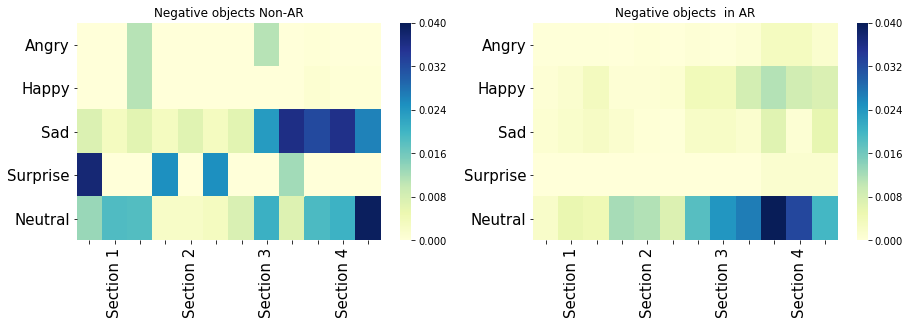

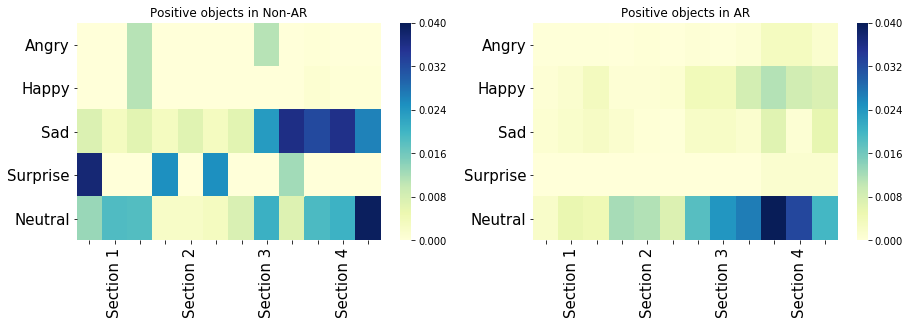

In [14]:
# Plot 
fig, axes = plt.subplots(figsize=(15, 4), ncols=2)
ax = sns.heatmap(NegNAR3.transpose(), cmap='YlGnBu', ax =axes[0],vmax =0.04)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_xticklabels(["","Section 1","","","Section 2","","","Section 3","","","Section 4",""])
ax.set(title="Negative objects Non-AR")
ax.set_xlabel("")  

# SubPlot 
ax = sns.heatmap(NegAR3.transpose(), cmap='YlGnBu', ax =axes[1], fmt='g',vmax =0.04)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_xticklabels(["","Section 1","","","Section 2","","","Section 3","","","Section 4",""])
ax.set(title="Negative objects  in AR")
ax.set_xlabel("") 




# Plot 
fig, axes = plt.subplots(figsize=(15, 4), ncols=2)
ax = sns.heatmap(PosNAR3.transpose(), cmap='YlGnBu', .ax =axes[0],vmax =0.04)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_xticklabels(["","Section 1","","","Section 2","","","Section 3","","","Section 4",""])
ax.set(title="Positive objects in Non-AR")
ax.set_xlabel("")  

# SubPlot 
ax = sns.heatmap(PosAR3.transpose(), cmap='YlGnBu', ax =axes[1], fmt='g',vmax =0.04)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_xticklabels(["","Section 1","","","Section 2","","","Section 3","","","Section 4",""])
ax.set(title="Positive objects in AR")
ax.set_xlabel("") 



Text(0.5, 15.0, '')

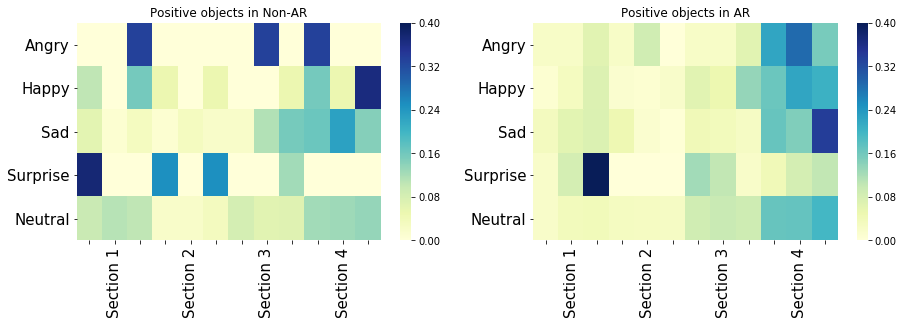

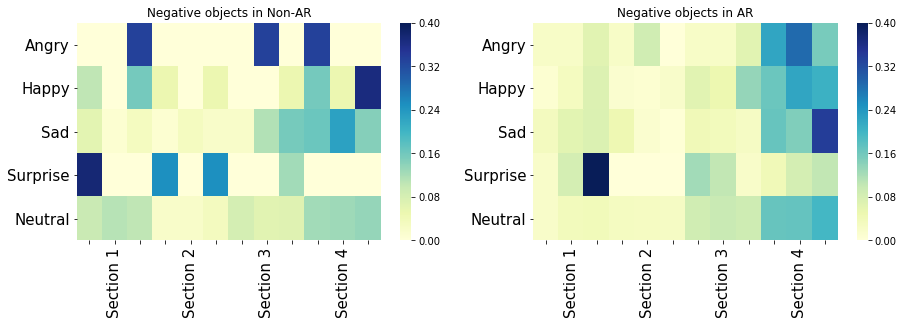

In [43]:
trailposNAR = PosNarData.groupby(gp_cols3)[emo_cols].sum().apply(
    lambda x: x / x.values.sum())
trailposAR = PosArData.groupby(gp_cols3)[emo_cols].sum().apply(
    lambda x: x / x.values.sum())



# Plot 
fig, axes = plt.subplots(figsize=(15, 4), ncols=2)
ax = sns.heatmap(trailposNAR.transpose(), cmap='YlGnBu', ax =axes[0],vmax =0.40)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_xticklabels(["","Section 1","","","Section 2","","","Section 3","","","Section 4",""])
ax.set(title="Positive objects in Non-AR")
ax.set_xlabel("")  

# SubPlot 
ax = sns.heatmap(trailposAR.transpose(), cmap='YlGnBu', ax =axes[1], fmt='g',vmax =0.40)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_xticklabels(["","Section 1","","","Section 2","","","Section 3","","","Section 4",""])
ax.set(title="Positive objects in AR")
ax.set_xlabel("") 




trailnegNAR = NegNarData.groupby(gp_cols3)[emo_cols].sum().apply(
    lambda x: x / x.values.sum())
trailnegAR = NegArData.groupby(gp_cols3)[emo_cols].sum().apply(
    lambda x: x / x.values.sum())



# Plot 
fig, axes = plt.subplots(figsize=(15, 4), ncols=2)
ax = sns.heatmap(trailnegNAR.transpose(), cmap='YlGnBu', ax =axes[0],vmax =0.40)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_xticklabels(["","Section 1","","","Section 2","","","Section 3","","","Section 4",""])
ax.set(title="Negative objects in Non-AR")
ax.set_xlabel("")  

# SubPlot 
ax = sns.heatmap(trailnegAR.transpose(), cmap='YlGnBu', ax =axes[1], fmt='g',vmax =0.40)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_xticklabels(["","Section 1","","","Section 2","","","Section 3","","","Section 4",""])
ax.set(title="Negative objects in AR")
ax.set_xlabel("") 


In [53]:
trailnegAR.values.sum()

4.999999999999999

In [75]:
trail = NegNarData.groupby(gp_cols3)[emo_cols].sum()
trail1 = trail.apply(
    lambda x: x / x.sum())
trail.sum(axis=0)

Angry         3.0
Happy        19.0
Sad          96.0
Surprise      8.0
Neutral     332.0
dtype: float64

In [77]:
trail

,Angry,Happy,Sad,Surprise,Neutral
d_ts,,,,,
"(-0.004, 0.333]",0.0,2.0,6.0,3.0,32.0
"(0.333, 0.667]",0.0,0.0,1.0,0.0,37.0
"(0.667, 1.0]",1.0,3.0,3.0,0.0,35.0
"(1.0, 1.333]",0.0,1.0,1.0,2.0,7.0
"(1.333, 1.667]",0.0,0.0,3.0,0.0,7.0
"(1.667, 2.0]",0.0,1.0,2.0,2.0,11.0
"(2.0, 2.333]",0.0,0.0,2.0,0.0,28.0
"(2.333, 2.667]",1.0,0.0,11.0,0.0,22.0
"(2.667, 3.0]",0.0,1.0,15.0,1.0,23.0


In [71]:
43.0*0.129518

5.569274